# Title

# Introduction

- We're examining a dataset depicting the Milwaukee real estate market from the years 2002-2018
- We can also pivot to just doing a specific year if needed
- Only thing we can realistically do that's not regression is probably a classification question using PropType and some other variable, probably price
- location parameter is probably going to be mean
- scale variable is standard deviation???

We can probably do something like look at the price per sqft of residential and commerical. Null hyptothesis is that there is no difference, then we can do all the graphs and p- values and stuff, then either do not accept or accept the null hypothesis. Can talk about type 1 type 2 error, and possible bias in data? or maybe come to a conclusion about why commerical properties are more expensive/less expensive than residential. Confidence interval stuff as well?

In this report, we will be analyzing a dataset representing the Milwaukee real estate data from 2002-2018. The data source is from a credible source (Milwaukee govt website) and is more than large enough size for data analysis. For our question, we will look at Residential versus Commercial properties and analyze their differences in terms of price per square foot. So, our response variable will be price per square foot, a column we will create ourselves via cleaning, and the explanatory variable will be property type, or PropType. Our location parameter will be difference mean price per square foot between Residential and Commercial, and our scale parameter will be the standard deviation (feel free to adjust these, SD is a placeholder rn).

# Preliminary Results

In [1]:
library(tidyverse)
library(repr)
library(datateachr)
library(digest)
library(infer)
library(gridExtra)
library(cowplot)
housing_data <- read.csv("https://raw.githubusercontent.com/mhuang306/STAT-201-proj/main/2002-2018-property-sales-data%5B1%5D.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




Here, we're importing any libraries that might be necessary for this assignment and reading the csv file off of our group's Github repository

In [4]:
head(housing_data)

,PropType,Taxkey,Address,CondoProject,District,Nbhd,Style,Extwall,Stories,Year_Built,Nr_of_rms,Fin_sqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>
1,Commercial,3230461110,2628 N 6TH ST,,6,6258,Commercial Exempt,,2,1880,0,1840,1,0,0,0,12750,2002-01,15900
2,Commercial,3590192000,1363 N PROSPECT AV,,3,6262,Mansions With Commercial Usage,,2,1876,0,6377,1,0,0,0,11840,2002-01,850000
3,Commercial,4161194000,617 S 94TH ST,,10,6272,Service Building,,1,1954,0,5022,1,0,0,0,9700,2002-01,119000
4,Commercial,1719836000,3624 W SILVER SPRING DR,,1,6218,"Store Bldg - Multi Story (Store & Apt, Store & O",,2,1955,0,6420,1,0,0,0,8792,2002-01,210000
5,Commercial,3480290000,3830 W LISBON AV,,15,6254,"Store Bldg - Multi Story (Store & Apt, Store & O",,2,1909,0,5956,1,0,0,0,4840,2002-01,48500
6,Commercial,4069983200,320 N 76TH ST,,10,6272,Strip Shopping Center,,1,1954,0,14200,1,0,0,0,16696,2002-01,885000


Here we do the cleaning for the data, removing NA values and zeroes, correcting column types, and stripping it down to just our potential variables of interest

In [3]:
housing_data <- housing_data |>
    mutate(PropType = as.factor(PropType)) |>
    select(PropType, Fin_sqft, Sale_price) |>
    filter(!is.na(PropType))|>
    filter(PropType == c("Residential", "Commercial")) |>
    filter(Fin_sqft != 0, Sale_price != 0) |>
    mutate(Price_per_sqft = Sale_price/Fin_sqft)

tail(housing_data)

Warning message:
“There were 2 warnings in `filter()`.
The first warning was:
ℹ In argument: `PropType == c("Residential", "Commercial")`.
Caused by warning in `==.default`:
! longer object length is not a multiple of shorter object length
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


,PropType,Fin_sqft,Sale_price,Price_per_sqft
,<fct>,<int>,<int>,<dbl>
6819,Residential,1609,205000,127.40833
6820,Residential,1467,229900,156.71438
6821,Residential,768,47500,61.84896
6822,Residential,1642,60000,36.54080
6823,Commercial,150000,10810000,72.06667
6824,Commercial,4254,1610000,378.46732


After this section we need to include some plots and stuff, I'm just going to make a simple bar graph that we can maybe use?

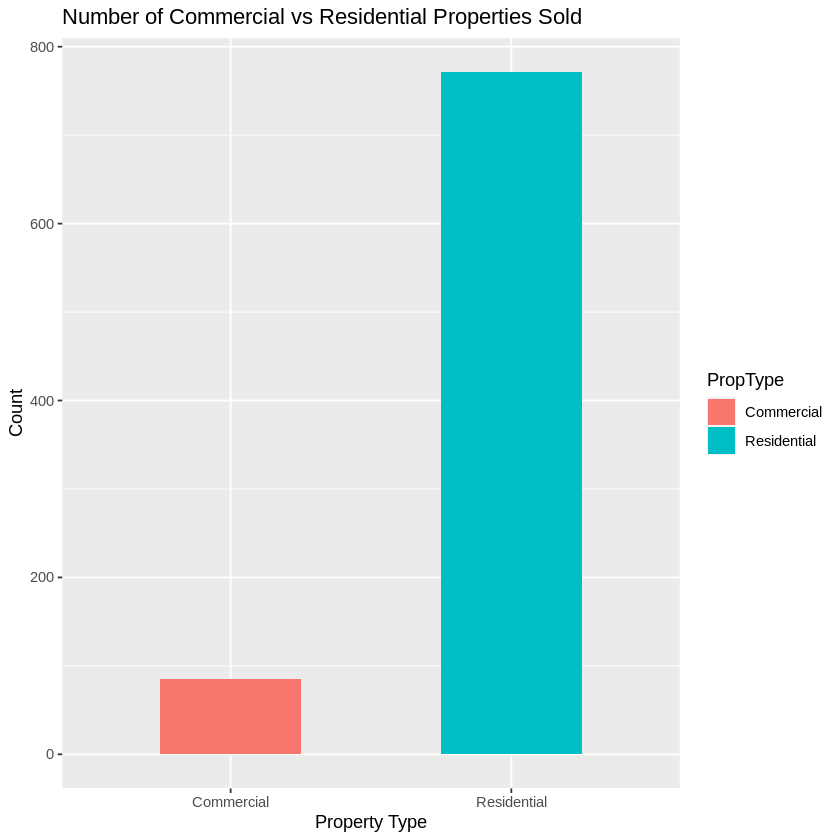

In [10]:
prop_type_bar <- housing_data |>
    ggplot(aes(x = PropType, fill = PropType)) +
    geom_bar(stat = "count", width = 0.5) +
    labs(x = "Property Type", y = "Count") +
    ggtitle("Number of Commercial vs Residential Properties Sold")

prop_type_bar

In [28]:
Residential_data <- housing_data |>
filter(PropType == "Residential")
Commerical_data <- housing_data |>
filter(PropType == "Commercial")

head(Residential_data)
head(Commerical_data)

,PropType,District,Nbhd,Year_Built,Fin_sqft,Sale_price,Price_per_sqft
,<fct>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,Residential,13,4520,1950,1188,115000,96.80135
2,Residential,12,4120,1921,1076,40000,37.17472
3,Residential,7,1740,1914,1515,91000,60.06601
4,Residential,2,1480,1942,1073,57000,53.12209
5,Residential,10,2540,1920,1620,139000,85.80247
6,Residential,14,4600,1916,1561,221900,142.15247


,PropType,District,Nbhd,Year_Built,Fin_sqft,Sale_price,Price_per_sqft
,<fct>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,Commercial,1,6216,1955,6975,128000,18.35125
2,Commercial,10,6252,1930,3225,56900,17.64341
3,Commercial,9,6418,1969,2146,1000000,465.98322
4,Commercial,12,6280,1937,2640,30000,11.36364
5,Commercial,12,6281,1890,2784,60000,21.55172
6,Commercial,10,6226,1957,4896,199900,40.82925


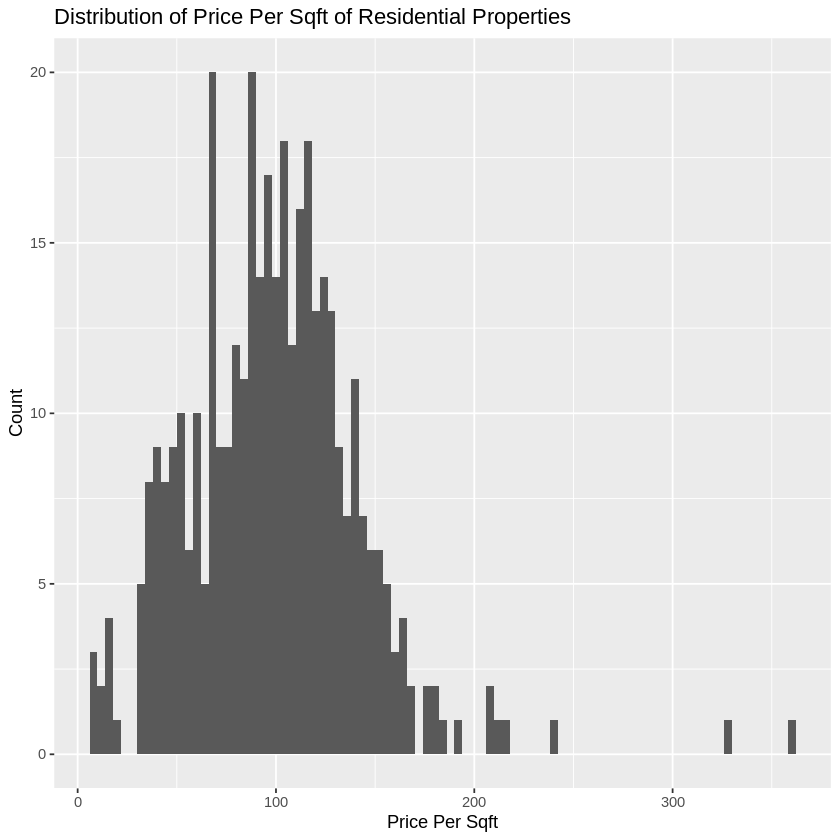

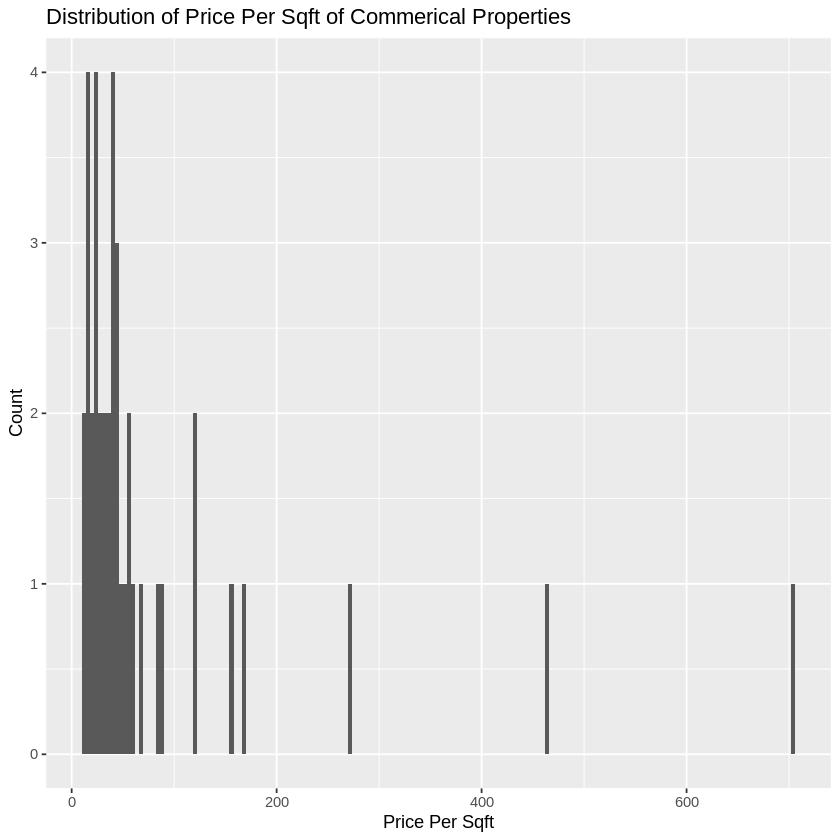

In [31]:
Res_price_per_sqft_dist <- Residential_data |>
    ggplot(aes(x = Price_per_sqft)) +
    geom_histogram(binwidth = 4) +
    labs(x = "Price Per Sqft", y = "Count") +
    ggtitle("Distribution of Price Per Sqft of Residential Properties")

Com_price_per_sqft_dist <- Commerical_data |>
    ggplot(aes(x = Price_per_sqft)) +
    geom_histogram(binwidth = 4) +
    labs(x = "Price Per Sqft", y = "Count") +
    ggtitle("Distribution of Price Per Sqft of Commerical Properties")

# NOTE: Commerical Data Frame is size only 40

Res_price_per_sqft_dist
Com_price_per_sqft_dist

# Methods: Plan

Not really sure what to write here so I'm gonna copy and paste from the course website:

Begin this Methods section with a brief description of “the good things” about this report – specifically, in what ways is this report trustworthy?

Continue by explaining why the plot(s) and estimates that you produced are not enough to give to a stakeholder, and what you should provide in addition to address this gap. Make sure your plans include at least one hypothesis test and one confidence interval. If possible, compare both the bootstrapping and asymptotics methods.

Finish this section by reflecting on how your final report might play out:

What do you expect to find?
What impact could such findings have?
What future questions could this lead to?

Through our analysis, we expect to find whether commercial and residential buildings have a similar price per square feet and if different, what are the factors that cause these differences. These impacts could help people such as our stakeholders with real estate investment, urban planning and property valuation. Additional questions we may have could be about external variables, such as whether market conditions, temporal trends, or governmental regulations also affected these differences in prices. 

# References

Here's some random stuff I found on UBC Library:

https://go.exlibris.link/gpWmDQBG

https://doi.org/10.1111/area.12555